Check if my-sql-connector is installed! && Installing the seaborn and matplotlib

In [152]:
!pip install mysql-connector-python pandas
!pip install seaborn matplotlib

## Imports

In [155]:
import mysql.connector
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("deep")
sns.set_theme(style="whitegrid", palette="deep")

In [29]:
host = "localhost"
user = "root"
password = "new-password"
database = "zywa"

# Establish a connection to the MySQL: 
try:
    connection = mysql.connector.connect(
        host=host,
        user=user,
        password=password,
        database=database
    )

    if connection.is_connected():
        print("Connected to MySQL database")

        # QUERY:
        query = f"SELECT * FROM transactions;"

        # execute the query and convert to dataframe object
        df = pd.read_sql(query, connection)

        print(df.head(5))

except mysql.connector.Error as err:
    print(f"Error: {err}")

finally:
    # Close the connection
    if connection.is_connected():
        connection.close()
        print("CONNECTION CLOSED")

Connected to MySQL database


/tmp/ipykernel_70826/3688118810.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


                      id                user_id        merchant_name  \
0  0-0002-aaee-1674-daed  0-0002-aaee-1674-daed         Beauty Bliss   
1  0-0002-ccee-6428-fdee  0-0002-ccee-6428-fdee         Tech Triumph   
2  0-0002-cede-5138-bfff  0-0002-cede-5138-bfff            Fit Focus   
3  0-0003-ebbb-4215-dcac  0-0003-ebbb-4215-dcac  Artistic Adventures   
4  0-0003-fcec-9425-eded  0-0003-fcec-9425-eded    Health Essentials   

        merchant_type   mcc  transaction_amount transaction_currency  \
0   Business Services  8761              980670                  EUR   
1         Electronics  1357              620547                  BRL   
2     Food & Beverage  1236              814795                  CNY   
3    Sports & Fitness  2103              604818                  CAD   
4  Books & Literature  3454              590565                  CNY   

   billing_amount billing_currency transaction_status transaction_timestamp  \
0          656869              AED               1829  

In [15]:
## check the first few rows of the dataset
df.head(5)

,id,user_id,merchant_name,merchant_type,mcc,transaction_amount,transaction_currency,billing_amount,billing_currency,transaction_status,transaction_timestamp,transaction_type,parent_transaction_id,card_entry
0,0-0002-aaee-1674-daed,0-0002-aaee-1674-daed,Beauty Bliss,Business Services,8761,980670,EUR,656869,AED,1829,1/12/23 9:49,ACCOUNT_VERIFICATION,None,Data on file
1,0-0002-ccee-6428-fdee,0-0002-ccee-6428-fdee,Tech Triumph,Electronics,1357,620547,BRL,177282,AED,1829,1/26/23 6:26,PURCHASE,None,unknown
2,0-0002-cede-5138-bfff,0-0002-cede-5138-bfff,Fit Focus,Food & Beverage,1236,814795,CNY,6325,AED,1002,2/17/23 2:38,PURCHASE,None,Attended POS
3,0-0003-ebbb-4215-dcac,0-0003-ebbb-4215-dcac,Artistic Adventures,Sports & Fitness,2103,604818,CAD,519401,AED,0,1/14/23 8:08,CASH_WITHDRAWAL,None,Attended POS
4,0-0003-fcec-9425-eded,0-0003-fcec-9425-eded,Health Essentials,Books & Literature,3454,590565,CNY,681275,AED,1002,1/26/23 19:45,ACCOUNT_VERIFICATION,None,Contactless


In [16]:
## check the shape of dataframe
df.shape

(109000, 14)

In [17]:
## convert the dataframe into csv for future analysis and manipulation
df.to_csv('df_csvfile.csv')

## metadata:


| Column Name            | Description                                                |
|------------------------|------------------------------------------------------------|
| id                     | Unique identifier for each transaction.                    |
| user_id                | Identifier for the user involved in the transaction.       |
| merchant_name          | Name of the merchant involved in the transaction.          |
| merchant_type          | Type or category of the merchant.                          |
| mcc                    | Merchant Category Code, a standardized code for the type of business. |
| transaction_amount     | The amount involved in the transaction.                    |
| transaction_currency   | Currency of the transaction amount.                         |
| billing_amount         | Amount billed for the transaction.                          |
| billing_currency       | Currency of the billing amount.                             |
| transaction_status     | Status of the transaction (e.g., completed, pending).      |
| transaction_timestamp  | Timestamp indicating when the transaction occurred.       |
| transaction_type       | Type of transaction (e.g., purchase, cast withdrawal).              |
| parent_transaction_id  | Identifier of the parent transaction if applicable.        |
| card_entry             | Method used for entering the card information (e.g., POS, contactless). |


## Descriptive Statistics:

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109000 entries, 0 to 108999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   id                     109000 non-null  object
 1   user_id                109000 non-null  object
 2   merchant_name          109000 non-null  object
 3   merchant_type          109000 non-null  object
 4   mcc                    109000 non-null  object
 5   transaction_amount     109000 non-null  int64 
 6   transaction_currency   109000 non-null  object
 7   billing_amount         109000 non-null  int64 
 8   billing_currency       109000 non-null  object
 9   transaction_status     109000 non-null  object
 10  transaction_timestamp  109000 non-null  object
 11  transaction_type       109000 non-null  object
 12  parent_transaction_id  5346 non-null    object
 13  card_entry             109000 non-null  object
dtypes: int64(2), object(12)
memory usage: 11.6+ MB


In [23]:
## Transaction amount and billing amount are the two numerical variables
df.describe()

,transaction_amount,billing_amount
count,109000.000000,109000.000000
mean,497936.069881,498441.848789
std,288905.493064,288186.224081
min,37.000000,2.000000
25%,248186.500000,249183.500000
50%,495231.000000,497928.000000
75%,749011.000000,747805.250000
max,999992.000000,999990.000000


In [26]:
## check the categorical columns:
df.select_dtypes(include=['object']).describe()

,id,user_id,merchant_name,merchant_type,mcc,transaction_currency,billing_currency,transaction_status,transaction_timestamp,transaction_type,parent_transaction_id,card_entry
count,109000,109000,109000,109000,109000,109000,109000,109000,109000,109000,5346,109000
unique,109000,103784,95,42,41,155,1,6,109000,4,5346,4
top,0-0002-aaee-1674-daed,1-3804-fcfe-6636-cbed,Beauty Bliss,Tech Products,2468,CNY,AED,0,1/12/23 9:49,PURCHASE,8-3978-fdfe-2094-fbdf,unknown
freq,1,2,2233,6825,4470,20047,109000,18274,1,65678,1,43595


1. There are 103784 unique user ID in the dataset
2. Beauty Bliss is the most preferred merchant
3. most preferred merchant_type is Tech Products
4. Most transaction are done in CNY: Chinese Yuan Renminbi
5. There are 155 Unique currencies

More insights to be discovered at the later stages:

In [245]:
## this is a scraped conversion rates, Can ignore, already dumped in the mysql database. 

In [226]:
## currency conversion for the transactions data
from io import StringIO

data = """Currency,CONVERSION TO AED
EUR,4.049301
BRL,0.754355
CNY,0.514911
CAD,2.767739
IDR,0.000238
SYP,0.000282
PLN,0.93
UAH,0.1
CZK,0.16
HTG,0.03
PEN,0.99
PHP,0.07
USD,3.67
THB,0.11
MYR,0.79
MXN,0.22
ZAR,0.2
MKD,0.07
AMD,0.01
MZN,0.06
RUB,0.04
JOD,5.18
JPY,0.03
SEK,0.37
TND,1.19
ILS,1.02
BDT,0.03
FJD,1.67
HRK,0.53
MAD,0.37
NOK,0.36
PGK,0.98
KMF,0.01
VND,0.000151
ARS,0.004563
PAB,3.67
MWK,0.002182
MNT,0.001069
VEF,0.000001029237
YER,0.01
RSD,0.03
UGX,0.000976
CRC,0.01
SDG,0.01
EGP,0.12
GTQ,0.47
UYU,0.09
HUF,0.01
XOF,0.01
XAF,0.01
LKR,0.01
MDL,0.21
LTL,1.24
HNL,0.15
NIO,0.1
IRR,0.000086897378
LYD,0.77
KZT,0.01
UZS,0.000297
SAR,0.98
DKK,0.54
NGN,0.004068
COP,0.000933
BWP,0.27
KES,0.02
ALL,0.04
GMD,0.05
NPR,0.03
OMR,9.54
GBP,4.67
DOP,0.06
MGA,0.000797
PKR,0.01
AFN,0.05
MVR,0.24
ZMW,0.14
KPW,0.00408
NAD,0.2
CUP,3.67
CDF,0.001284
LRD,0.02
TZS,0.00146
MUR,0.08
AZN,2.16
BYR,1.11
BGN,2.07
AOA,0.004417
KRW,0.002832
XCD,1.36
BOB,0.53
JMD,0.02
PYG,0.000498
KGS,0.04
BAM,2.07
CLP,0.004167
GHS,0.31
TJS,0.34
AUD,2.51
XPF,0.03
GEL,1.37
SLL,0.000186
ZWL,0.01
SBD,0.44
KHR,0.000895
IQD,0.002804
MMK,0.001749
ETB,0.07
BSD,3.67
NZD,2.32
RON,0.81
STD,2.9
MOP,0.46
HKD,0.47
TMT,1.05
WST,1.36
AED,1
LAK,0.000179
KWD,11.95
GNF,0.000427
SOS,0.01
MRO,0.09
BHD,9.74
BTN,0.04
BIF,0.00129
LSL,0.2
TWD,0.12
QAR,1.01
CHF,4.3
SGD,2.78
SZL,0.2
ANG,2.04
SCR,0.27
SRD,0.1
INR,0.04
CVE,0.04
TTD,0.54
BZD,1.82
SSP,1.82
RWF,0.002924
LBP,0.000244
BND,2.77
ISK,0.03
ERN,0.24
BBD,1.82
GYD,0.02
KYD,4.41
TRY,0.13
DJF,0.02
AWG,2.04
VUV,0.03
SHP,2.9
TOP,1.57
FKP,4.65
BMD,3.67
DZD,0.03"""

# Creating a DataFrame
currency = pd.read_csv(StringIO(data))

# Displaying the DataFrame
print(currency)

    Currency  CONVERSION TO AED
0        EUR           4.049301
1        BRL           0.754355
2        CNY           0.514911
3        CAD           2.767739
4        IDR           0.000238
..       ...                ...
150      SHP           2.900000
151      TOP           1.570000
152      FKP           4.650000
153      BMD           3.670000
154      DZD           0.030000

[155 rows x 2 columns]


In [227]:
currency.to_csv('currency_to_AED.csv')

## SQL Queries

### Monthly transactions

Need how much amount we have processed each month cummutative and every month.

### **Most Popular Products/Services:**

Design a SQL query to identify the top 5 most popular products or services based on transaction counts.

### **Daily Revenue Trend:**

Formulate a SQL query to visualize the daily revenue trend over time.

### **Average Transaction Amount by Product Category:**

Formulate a SQL query to find the average transaction amount for each product category.

### **Transaction Funnel Analysis:**

Create a SQL query to analyze the transaction funnel, including completed, pending, and cancelled transactions.

### **Monthly Retention Rate:**

Design a SQL query to calculate the Monthly Retention Rate, grouping users into monthly cohorts.

## Monthly Transactions:

In [63]:
## Main driver code: Converted to the function:
def MYSQL_QUERY(query):
    try:
        # Connect to the local database
        connection = mysql.connector.connect(
            host="localhost",
            user="root",
            password="new-password",
            database="zywa"
        )

        if connection.is_connected():
            print("Connected to MySQL database")
            cursor = connection.cursor()
            cursor.execute(query)
            
            result = cursor.fetchall()
            print(result)
            
            return result

    except mysql.connector.Error as err:
        print(f"Error: {err}")

    finally:
        if connection.is_connected():
            connection.close()
            print("Connection closed")

In [233]:
query1 = """

SELECT DATE_FORMAT(STR_TO_DATE(transaction_timestamp, '%m/%d/%y %H:%i'), '%Y-%m') AS month_format_timestamp, 
    t.transaction_timestamp AS string_format_timestamp,
    t.transaction_amount * cr.ConversionRate AS new_transaction_amount
FROM transactions t INNER JOIN currency_rates cr ON t.transaction_currency = cr.Currency 
LIMIT 10;

"""

In [234]:
result1 = MYSQL_QUERY(query1)

Connected to MySQL database
[('2023-01', '1/12/23 9:49', 3971028.1562805176), ('2023-01', '1/26/23 6:26', 468112.7404820323), ('2023-02', '2/17/23 2:38', 419546.90495342016), ('2023-01', '1/14/23 8:08', 1673978.4013037682), ('2023-01', '1/26/23 19:45', 304088.41232925653), ('2023-02', '2/25/23 2:44', 61.326410263282014), ('2023-01', '1/26/23 15:22', 126.61715112806996), ('2023-02', '2/23/23 18:37', 331615.6825504303), ('2023-03', '3/16/23 23:05', 31249.000465646386), ('2023-02', '2/6/23 16:13', 158762.39645138383)]
Connection closed


/tmp/ipykernel_70826/230398598.py:20: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [235]:
## the conversion is working fine

In [236]:
query2 = """

SELECT DISTINCT(DATE_FORMAT(STR_TO_DATE(transaction_timestamp, '%m/%d/%y %H:%i'), '%Y-%m')) AS month
FROM transactions
"""

In [237]:
result2 = MYSQL_QUERY(query2)

Connected to MySQL database
[('2023-01',), ('2023-02',), ('2023-03',)]
Connection closed


/tmp/ipykernel_70826/230398598.py:20: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



The dataset corresponds to the months of January, February, and March in the year 2023.

In [97]:
query3 = """
SELECT DATE_FORMAT(STR_TO_DATE(transaction_timestamp, '%m/%d/%y %H:%i'), '%Y-%m') AS month,
        SUM(billing_amount) AS total_billing_amount_processed_AED
FROM transactions
GROUP BY month
ORDER BY month

"""

In [98]:
result3 = MYSQL_QUERY(query3)

Connected to MySQL database
[('2023-01', Decimal('22208281287')), ('2023-02', Decimal('20084188114')), ('2023-03', Decimal('12037692117'))]
Connection closed


/tmp/ipykernel_70826/230398598.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [119]:
result3

,month,total_billing_amount_processed_AED
0,2023-01,2.220828e+10
1,2023-02,2.008419e+10
2,2023-03,1.203769e+10


In [120]:
result3['cumulative_amount'] = result3['total_billing_amount_processed_AED'].cumsum()
result3

,month,total_billing_amount_processed_AED,cumulative_amount
0,2023-01,2.220828e+10,2.220828e+10
1,2023-02,2.008419e+10,4.229247e+10
2,2023-03,1.203769e+10,5.433016e+10


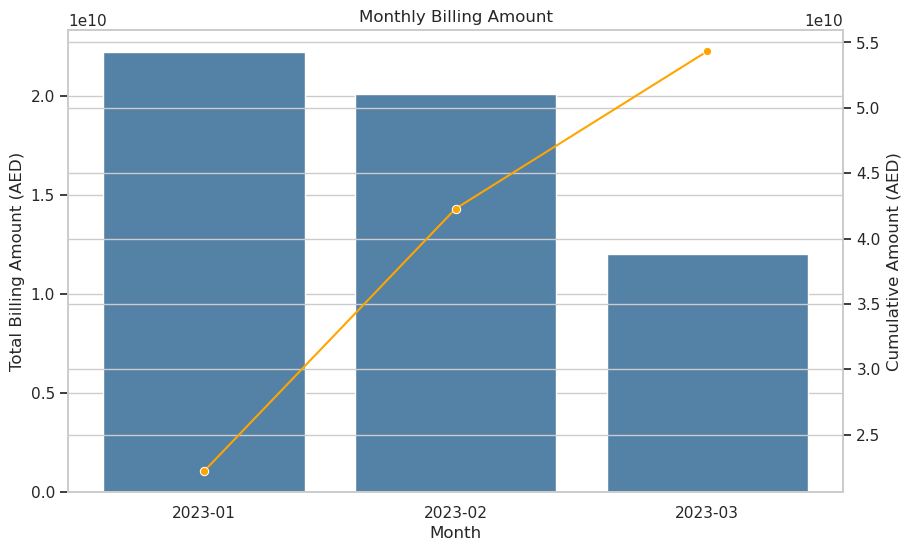

In [224]:
## Graphing

plt.figure(figsize=(10, 6))
sns.barplot(x='month',
            y='total_billing_amount_processed_AED',
            data=result3, 
            color='steelblue')
plt.title('Total Billing Amount Processed (AED)')
plt.xlabel('Month')
plt.ylabel('Total Billing Amount (AED)')
plt.title('Monthly Billing Amount')

# Trendline for cumulative amount
ax2 = plt.twinx()
sns.lineplot(x='month',
             y='cumulative_amount',
             data=result3,
             color='orange',
             marker='o',
             ax=ax2)
ax2.set_ylabel('Cumulative Amount (AED)')

plt.show()

In [241]:
query3B = """
SELECT 
    DATE_FORMAT(STR_TO_DATE(transaction_timestamp, '%m/%d/%y %H:%i'), '%Y-%m') AS month,
    SUM(t.transaction_amount * cr.ConversionRate) AS total_transaction_amount_processed_AED
FROM 
    transactions t
INNER JOIN 
    currency_rates cr ON t.transaction_currency = cr.Currency
GROUP BY 
    month
ORDER BY 
    month;

"""

In [242]:
result3B = MYSQL_QUERY(query3B)

Connected to MySQL database
[('2023-01', 20127456567.528862), ('2023-02', 18508929903.5384), ('2023-03', 10764602233.130764)]
Connection closed


/tmp/ipykernel_70826/230398598.py:20: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [243]:
result3B['cumulative_amount'] = result3B['total_transaction_amount_processed_AED'].cumsum()
result3B

,month,total_transaction_amount_processed_AED,cumulative_amount
0,2023-01,2.012746e+10,2.012746e+10
1,2023-02,1.850893e+10,3.863639e+10
2,2023-03,1.076460e+10,4.940099e+10


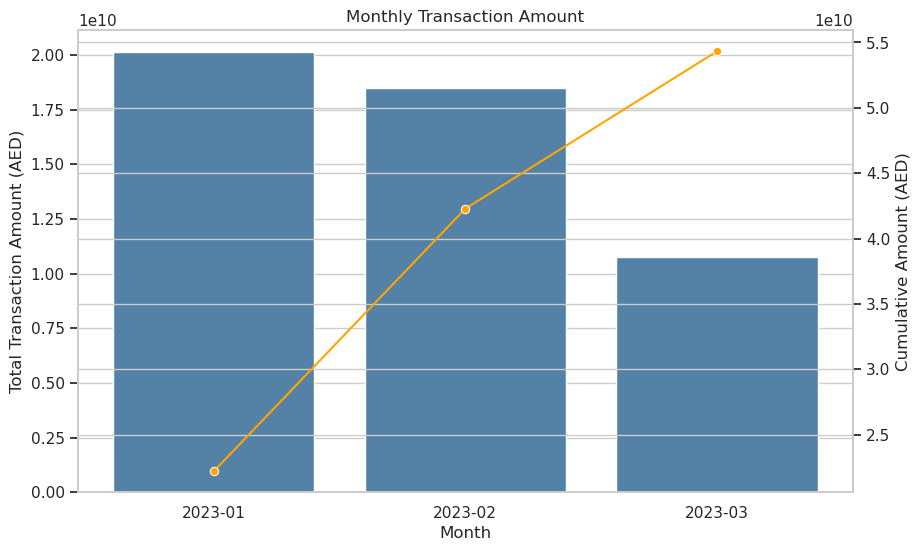

In [244]:
## Graphing

plt.figure(figsize=(10, 6))
sns.barplot(x='month',
            y='total_transaction_amount_processed_AED',
            data=result3B, 
            color='steelblue')
plt.title('Total Transaction Amount Processed (AED)')
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount (AED)')
plt.title('Monthly Transaction Amount')

# Trendline for cumulative amount
ax2 = plt.twinx()
sns.lineplot(x='month',
             y='cumulative_amount',
             data=result3,
             color='orange',
             marker='o',
             ax=ax2)
ax2.set_ylabel('Cumulative Amount (AED)')

plt.show()

Its more or less giving the same results so if we go with the billing thats okay

## Design a SQL query to identify the top 5 most popular products or services based on transaction counts.

In [170]:
query5 = """
SELECT
    merchant_name,
    COUNT(*) AS transaction_count
FROM transactions
GROUP BY merchant_name
ORDER BY transaction_count DESC;

"""

In [171]:
result5 = MYSQL_QUERY(query5)

Connected to MySQL database
[('Beauty Bliss', 2233), ('Tech Touch', 2206), ('Home Harmony', 2186), ('Hobby Haven', 2151), ('Tech Trends', 2103), ('Smart Style', 1179), ('Artistic Creations', 1177), ('Fashion Trends', 1172), ('Outdoor Adventures', 1171), ('Business Bliss', 1161), ('Artistic Aura', 1161), ('Gaming Glory', 1152), ('Foodie Haven', 1152), ('Outdoor Odyssey', 1148), ('Food Fusion', 1141), ('Auto Advantage', 1137), ('Digital Dream', 1135), ('Global Goods', 1132), ('Fit Focus', 1130), ('Artistic Adventures', 1129), ('Gaming Galaxy', 1125), ('Sports Unlimited', 1122), ('Wellness Hub', 1122), ('Eco Essence', 1121), ('Tech Time', 1120), ('Tech Emporium', 1118), ('Book Nook', 1117), ('Business Bistro', 1116), ('Pet Purrfection', 1115), ('Book Buffet', 1113), ('Culinary Creations', 1112), ('Home Sweet Home', 1111), ('Artistic Express', 1106), ('Kids Kingdom', 1105), ('Health Hub', 1103), ('Gaming Gala', 1103), ('Bookworm Haven', 1103), ('Tech Triumph', 1101), ('Smart Synergy', 1100

/tmp/ipykernel_70826/230398598.py:20: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [172]:
result5

,merchant_name,transaction_count
0,Beauty Bliss,2233
1,Tech Touch,2206
2,Home Harmony,2186
3,Hobby Haven,2151
4,Tech Trends,2103
...,...,...
90,Home Decor Hub,1037
91,Digital Dreams,1031
92,Eco Elegance,1028
93,Beauty Bloom,1015


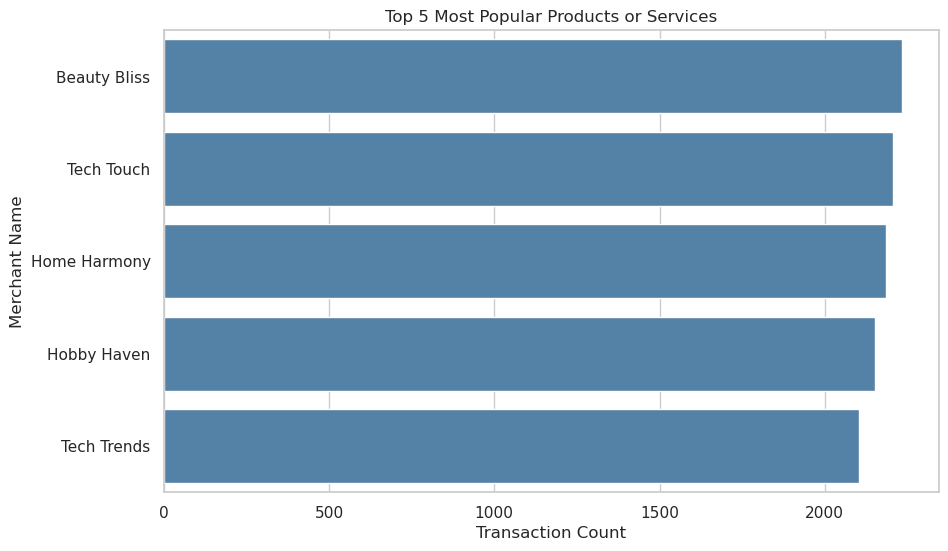

In [173]:
## Graphing:

plt.figure(figsize=(10, 6))
sns.barplot(x='transaction_count',
            y='merchant_name',
            data=result5.head(5), 
            color='steelblue')
plt.title('Top 5 Most Popular Products or Services')
plt.xlabel('Transaction Count')
plt.ylabel('Merchant Name')

# Show the plot
plt.show()

## Daily Revenue Trend:

In [122]:
query6 = """
SELECT
    DATE_FORMAT(STR_TO_DATE(transaction_timestamp, '%m/%d/%y %H:%i'), '%Y-%m-%d') AS day,
    SUM(billing_amount) AS daily_revenue
FROM transactions
GROUP BY day
ORDER BY day;
"""

In [129]:
result6 = MYSQL_QUERY(query6)

Connected to MySQL database
[('2023-01-01', Decimal('712071822')), ('2023-01-02', Decimal('721901610')), ('2023-01-03', Decimal('712635739')), ('2023-01-04', Decimal('722376477')), ('2023-01-05', Decimal('729875569')), ('2023-01-06', Decimal('706303896')), ('2023-01-07', Decimal('713984691')), ('2023-01-08', Decimal('706575650')), ('2023-01-09', Decimal('724189417')), ('2023-01-10', Decimal('714543703')), ('2023-01-11', Decimal('731602234')), ('2023-01-12', Decimal('707632113')), ('2023-01-13', Decimal('721335797')), ('2023-01-14', Decimal('701997618')), ('2023-01-15', Decimal('723500694')), ('2023-01-16', Decimal('710237979')), ('2023-01-17', Decimal('721920093')), ('2023-01-18', Decimal('688044603')), ('2023-01-19', Decimal('741917961')), ('2023-01-20', Decimal('722078533')), ('2023-01-21', Decimal('718135448')), ('2023-01-22', Decimal('697724592')), ('2023-01-23', Decimal('725101343')), ('2023-01-24', Decimal('718804617')), ('2023-01-25', Decimal('710828858')), ('2023-01-26', Decima

/tmp/ipykernel_70826/230398598.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [130]:
result6

,day,daily_revenue
0,2023-01-01,712071822.0
1,2023-01-02,721901610.0
2,2023-01-03,712635739.0
3,2023-01-04,722376477.0
4,2023-01-05,729875569.0
...,...,...
71,2023-03-13,709971224.0
72,2023-03-14,726980488.0
73,2023-03-15,716743966.0
74,2023-03-16,723292528.0


In [167]:
import plotly.express as px

result6['day'] = pd.to_datetime(result6['day'])

fig = px.line(result6, 
              x='day', 
              y='daily_revenue',
              markers=True,
              line_shape='linear',
              title='Daily Revenue Trend')

fig.update_layout(
    xaxis_title='Day',
    yaxis_title='Daily Revenue',
    hovermode='x',
)

fig.show()

## Average Transaction Amount by Product Category

In [134]:
query7 = """
SELECT
    merchant_type,
    AVG(billing_amount) AS avg_billing_amount
FROM transactions
GROUP BY merchant_type
ORDER BY avg_billing_amount desc;

""" 

In [135]:
result7 = MYSQL_QUERY(query7)

Connected to MySQL database
[('Art & Craft', Decimal('517626.5501')), ('Smart Home', Decimal('511525.9934')), ('Health & Wellness', Decimal('509882.4468')), ('Automotive', Decimal('509366.3330')), ('Luxury Products', Decimal('508542.8365')), ('Technology', Decimal('508230.3635')), ('Pet Care', Decimal('507374.6288')), ('Books & Literature', Decimal('506462.1586')), ('Digital Services', Decimal('505843.6090')), ('Fashion', Decimal('503731.1247')), ('Books & Magazines', Decimal('503676.0222')), ('Food & Beverage', Decimal('503232.9788')), ('Business Services', Decimal('502142.6176')), ('Music & Entertainment', Decimal('501925.6721')), ('Beauty Products', Decimal('501587.8264')), ('Hobbies & Crafts', Decimal('501336.8986')), ('Beauty & Personal Care', Decimal('501271.2906')), ('Auto Services', Decimal('499400.5252')), ('Food & Drinks', Decimal('498790.2336')), ('Wellness Products', Decimal('498773.5207')), ('Fitness', Decimal('498655.1483')), ('Culinary Products', Decimal('498464.6558')),

/tmp/ipykernel_70826/230398598.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [136]:
result7

,merchant_type,avg_billing_amount
0,Art & Craft,517626.5501
1,Smart Home,511525.9934
2,Health & Wellness,509882.4468
3,Automotive,509366.3330
4,Luxury Products,508542.8365
5,Technology,508230.3635
6,Pet Care,507374.6288
7,Books & Literature,506462.1586
8,Digital Services,505843.6090
9,Fashion,503731.1247


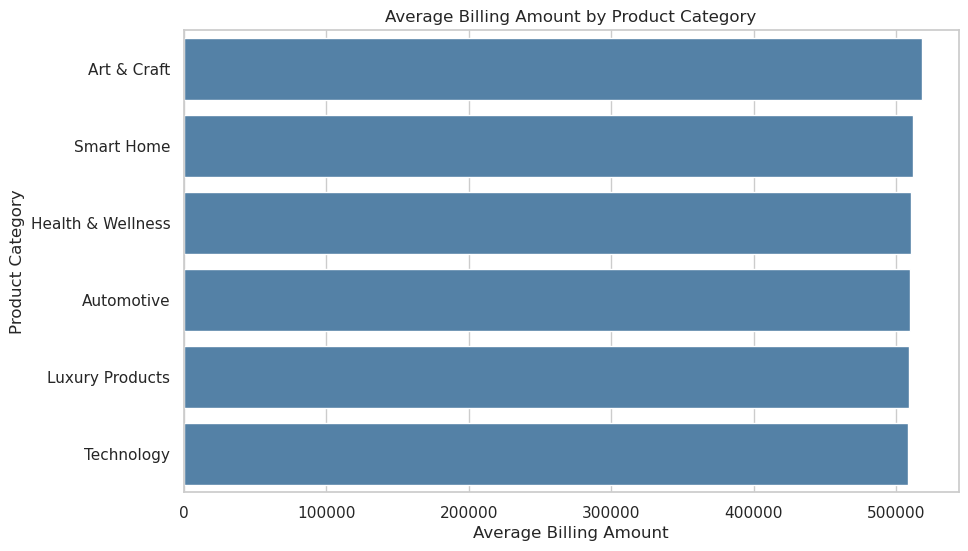

In [169]:
plt.figure(figsize=(10, 6))
sns.barplot(x='avg_billing_amount',
            y='merchant_type', 
            data=result7.head(6), 
            color='steelblue')
plt.title('Average Billing Amount by Product Category')
plt.xlabel('Average Billing Amount')
plt.ylabel('Product Category')

plt.show()

## Transaction Funnel Analysis:

In [137]:
query8 = """
SELECT
    transaction_status,
    COUNT(*) AS transaction_count
FROM transactions
GROUP BY transaction_status;

"""

In [138]:
result8 = MYSQL_QUERY(query8)

Connected to MySQL database
[('1829', 18101), ('1002', 18181), ('0', 18274), ('1006', 18226), ('1022', 18157), ('9102', 18061)]
Connection closed


/tmp/ipykernel_70826/230398598.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [139]:
result8

,transaction_status,transaction_count
0,1829,18101
1,1002,18181
2,0,18274
3,1006,18226
4,1022,18157
5,9102,18061


| Code | Meaning                        | Status  |
|------|--------------------------------|---------|
| 0000 | Approved                       | SUCCESS |
| 1829 | Bad authorization code         | FAILED  |
| 1002 | Suspected fraud                | FAILED  |
| 1006 | Allowable PIN tries exceeded   | FAILED  |
| 1022 | Security violation             | MISSING |
| 9102 | Invalid transaction            | MISSING |


In [148]:
## mapping:

data = {'transaction_status': [1829, 1002, 0, 1006, 1022, 9102],
        'transaction_count': [18101, 18181, 18274, 18226, 18157, 18061]}

status_mapping = {
    '0': 'SUCCESS',
    '1829': 'FAILED',
    '1002': 'FAILED',
    '1006': 'FAILED',
    '1022': 'MISSING',
    '9102': 'MISSING'
}

In [149]:
result8['status_meaning'] = result8['transaction_status'].map(status_mapping)

In [150]:
result8

,transaction_status,transaction_count,status_meaning
0,1829,18101,FAILED
1,1002,18181,FAILED
2,0,18274,SUCCESS
3,1006,18226,FAILED
4,1022,18157,MISSING
5,9102,18061,MISSING


In [209]:
tf = result8.groupby('status_meaning')['transaction_count'].sum().reset_index().sort_values(by='transaction_count', ascending=False)
tf

,status_meaning,transaction_count
0,FAILED,54508
1,MISSING,36218
2,SUCCESS,18274


In [210]:
# Create a funnel chart
fig = px.funnel(
    tf,
    x='status_meaning', 
    y='transaction_count', 
    title='Transaction Funnel',
    labels={'stage': 'Funnel Stage', 'transaction_count': 'Transaction Count'},
)
fig.show()


## Average transaction Amount and Average Transaction Count Scatter Plot

In [189]:
## Transaction Count
query9 = """
SELECT
    merchant_type,
    COUNT(*) AS transaction_count
FROM transactions
GROUP BY merchant_type
ORDER BY transaction_count DESC;

"""

In [190]:
result9 = MYSQL_QUERY(query9)

Connected to MySQL database
[('Tech Products', 6825), ('Books & Literature', 4652), ('Fashion', 4458), ('Eco-friendly Products', 3554), ('Gaming Products', 3541), ('Food & Drinks', 3523), ('Outdoor Products', 3520), ('Family Entertainment', 3517), ('Culinary Products', 3495), ('Smart Gadgets', 3472), ('Auto Services', 3467), ('Health & Fitness', 3449), ('Home Decor', 3437), ('Artistic Products', 3437), ('Beauty Products', 3433), ('Global Goods', 3432), ('Fitness', 3425), ('Luxury Products', 3418), ('Pet Supplies', 3415), ('Wellness Products', 3407), ('Hobbies & Crafts', 3401), ('Business Services', 3397), ('Digital Services', 3371), ('Kids Products', 3320), ('Technology', 1227), ('Pet Care', 1215), ('Smart Home', 1213), ('Travel & Leisure', 1192), ('Electronics', 1182), ('Art & Craft', 1167), ('Sports & Fitness', 1152), ('Health & Wellness', 1146), ('Beauty & Personal Care', 1139), ('Food & Beverage', 1131), ('Wellness', 1129), ('Books & Magazines', 1127), ('Automotive', 1123), ('Gamin

/tmp/ipykernel_70826/230398598.py:20: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [191]:
## Average Transaction Amount
query10 = """
SELECT
    merchant_type,
    AVG(billing_amount) AS avg_billing_amount
FROM transactions
GROUP BY merchant_type
ORDER BY avg_billing_amount desc;

"""

In [192]:
result10 = MYSQL_QUERY(query10)

Connected to MySQL database
[('Art & Craft', Decimal('517626.5501')), ('Smart Home', Decimal('511525.9934')), ('Health & Wellness', Decimal('509882.4468')), ('Automotive', Decimal('509366.3330')), ('Luxury Products', Decimal('508542.8365')), ('Technology', Decimal('508230.3635')), ('Pet Care', Decimal('507374.6288')), ('Books & Literature', Decimal('506462.1586')), ('Digital Services', Decimal('505843.6090')), ('Fashion', Decimal('503731.1247')), ('Books & Magazines', Decimal('503676.0222')), ('Food & Beverage', Decimal('503232.9788')), ('Business Services', Decimal('502142.6176')), ('Music & Entertainment', Decimal('501925.6721')), ('Beauty Products', Decimal('501587.8264')), ('Hobbies & Crafts', Decimal('501336.8986')), ('Beauty & Personal Care', Decimal('501271.2906')), ('Auto Services', Decimal('499400.5252')), ('Food & Drinks', Decimal('498790.2336')), ('Wellness Products', Decimal('498773.5207')), ('Fitness', Decimal('498655.1483')), ('Culinary Products', Decimal('498464.6558')),

/tmp/ipykernel_70826/230398598.py:20: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [193]:
result9

,merchant_type,transaction_count
0,Tech Products,6825
1,Books & Literature,4652
2,Fashion,4458
3,Eco-friendly Products,3554
4,Gaming Products,3541
5,Food & Drinks,3523
6,Outdoor Products,3520
7,Family Entertainment,3517
8,Culinary Products,3495
9,Smart Gadgets,3472


In [194]:
result10

,merchant_type,avg_billing_amount
0,Art & Craft,517626.5501
1,Smart Home,511525.9934
2,Health & Wellness,509882.4468
3,Automotive,509366.3330
4,Luxury Products,508542.8365
5,Technology,508230.3635
6,Pet Care,507374.6288
7,Books & Literature,506462.1586
8,Digital Services,505843.6090
9,Fashion,503731.1247


In [195]:
merged_df = pd.merge(result9, result10, on='merchant_type')
merged_df

,merchant_type,transaction_count,avg_billing_amount
0,Tech Products,6825,497583.2401
1,Books & Literature,4652,506462.1586
2,Fashion,4458,503731.1247
3,Eco-friendly Products,3554,493771.3680
4,Gaming Products,3541,492895.5561
5,Food & Drinks,3523,498790.2336
6,Outdoor Products,3520,495653.3503
7,Family Entertainment,3517,484215.9997
8,Culinary Products,3495,498464.6558
9,Smart Gadgets,3472,496937.4205


In [206]:
fig = px.scatter(merged_df, 
                 x='transaction_count', 
                 y='avg_billing_amount', 
                 text='merchant_type', 
                 title='Scatter Plot of Transaction Count vs. Avg Billing Amount',
                 labels={'transaction_count': 'Transaction Count', 'avg_billing_amount': 'Average Billing Amount'},
                 hover_data=['merchant_type'])
fig.update_layout(
    showlegend=False,  # Hide legend for simplicity
    xaxis_title='Transaction Count',
    yaxis_title='Average Billing Amount',
    hovermode='closest',
    width=800, 
    height=800, 
    
)
fig.show()

In [216]:
df['billing_transaction_ratio'] = df['billing_amount'] / df['transaction_amount']
result = df.groupby('transaction_currency')['billing_transaction_ratio'].mean().reset_index()
result

,transaction_currency,billing_transaction_ratio
0,AED,2.187270
1,AFN,5.412267
2,ALL,2.976406
3,AMD,22.049902
4,ANG,1.485917
...,...,...
150,XPF,6.476507
151,YER,2.585372
152,ZAR,4.190268
153,ZMW,2.367023


In [217]:
df.isna().sum()

id                                0
user_id                           0
merchant_name                     0
merchant_type                     0
mcc                               0
transaction_amount                0
transaction_currency              0
billing_amount                    0
billing_currency                  0
transaction_status                0
transaction_timestamp             0
transaction_type                  0
parent_transaction_id        103654
card_entry                        0
billing_transaction_ratio         0
dtype: int64

In [219]:
df['transaction_currency'].unique()

array(['EUR', 'BRL', 'CNY', 'CAD', 'IDR', 'SYP', 'PLN', 'UAH', 'CZK',
       'HTG', 'PEN', 'PHP', 'USD', 'THB', 'MYR', 'MXN', 'ZAR', 'MKD',
       'AMD', 'MZN', 'RUB', 'JOD', 'JPY', 'SEK', 'TND', 'ILS', 'BDT',
       'FJD', 'HRK', 'MAD', 'NOK', 'PGK', 'KMF', 'VND', 'ARS', 'PAB',
       'MWK', 'MNT', 'VEF', 'YER', 'RSD', 'UGX', 'CRC', 'SDG', 'EGP',
       'GTQ', 'UYU', 'HUF', 'XOF', 'XAF', 'LKR', 'MDL', 'LTL', 'HNL',
       'NIO', 'IRR', 'LYD', 'KZT', 'UZS', 'SAR', 'DKK', 'NGN', 'COP',
       'BWP', 'KES', 'ALL', 'GMD', 'NPR', 'OMR', 'GBP', 'DOP', 'MGA',
       'PKR', 'AFN', 'MVR', 'ZMW', 'KPW', 'NAD', 'CUP', 'CDF', 'LRD',
       'TZS', 'MUR', 'AZN', 'BYR', 'BGN', 'AOA', 'KRW', 'XCD', 'BOB',
       'JMD', 'PYG', 'KGS', 'BAM', 'CLP', 'GHS', 'TJS', 'AUD', 'XPF',
       'GEL', 'SLL', 'ZWL', 'SBD', 'KHR', 'IQD', 'MMK', 'ETB', 'BSD',
       'NZD', 'RON', 'STD', 'MOP', 'HKD', 'TMT', 'WST', 'AED', 'LAK',
       'KWD', 'GNF', 'SOS', 'MRO', 'BHD', 'BTN', 'BIF', 'LSL', 'TWD',
       'QAR', 'CHF',